In [30]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import models
from tensorflow.keras import layers

import pandas as pd

# Eksploracyjna analiza danych

Celem projektu jest utworzenie zbioru notatników Jupyter Notebook, których
zadaniem jest klasyfikacja atrakcyjności danego samochodu. Brane będą pod uwagę
zmienne m.in. cena, specyfikacje, koszty utrzymania, poziom komfortu itp. Na tej podstawie
program ustali czy samochód jest bardzo dobry, dobry, akceptowalny lub nieakceptowalny.
Analizowanym zbiorem danych jest Car Evaluation Data Set ze strony
https://archive.ics.uci.edu/ml/datasets/Car+Evaluation. Zawiera on ok. 1700 rekordów i nie
zawiera brakujących danych. Służy on do klasyfikacji atrakcyjności samochodu.

Na początku wczytano wyżej wymieniony zbiór danych, który zostanie przeanalizowany przy użyciu biblioteki Pandas, oraz wyświetlono jego fragment na ekranie.

In [31]:
cars = pd.read_csv('car.data', encoding='utf-8')

In [32]:
cars

,buying,maint,doors,persons,lug_boot,safety,accept
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


Nastepnie wyświetlono typ danych poszczególnych kolumn. Jak widać poniżej, wszystkie mają Pythonowy typ object.

In [33]:
cars.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
accept      object
dtype: object

Potem wyświetlono wszystkie możliwe wartości atrybutów dla każdej kolumy. Wszystkie mają 3 lub 4 możliwe wartości.

In [34]:
cars.buying.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [35]:
cars.maint.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [36]:
cars.doors.unique()

array(['2', '3', '4', '5more'], dtype=object)

In [37]:
cars.persons.unique()

array(['2', '4', 'more'], dtype=object)

In [38]:
cars.lug_boot.unique()

array(['small', 'med', 'big'], dtype=object)

In [39]:
cars.safety.unique()

array(['low', 'med', 'high'], dtype=object)

In [40]:
cars.accept.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

Następnie sporządzono histogramy dla każdej z kolumn. Jak widać poniżej, dla wszystkich kolumn liczba atrybutów są równe, co może oznaczać że zbiór danych jest mocno zrównoważony.

<AxesSubplot: >

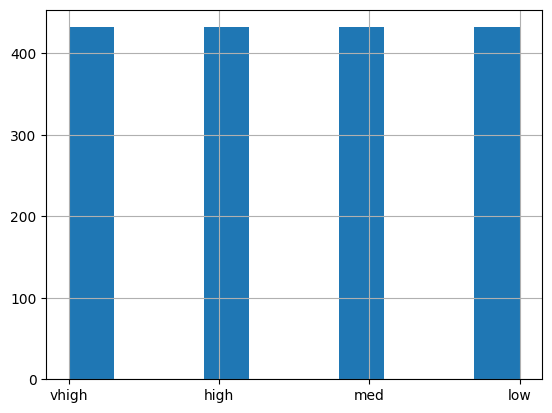

In [41]:
cars["buying"].hist()

<AxesSubplot: >

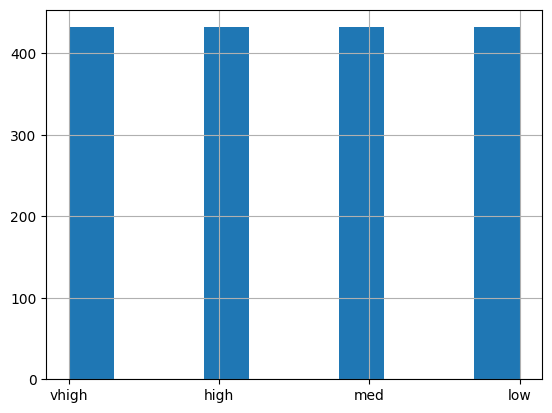

In [42]:
cars["maint"].hist()

<AxesSubplot: >

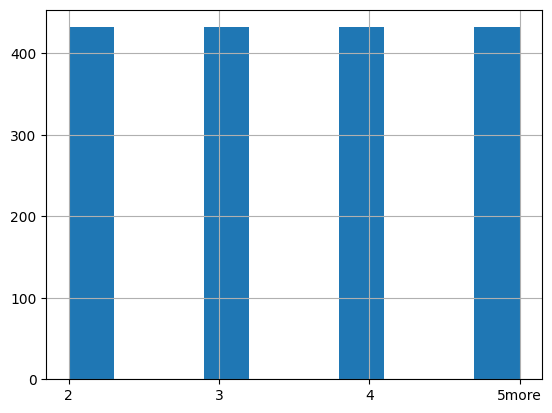

In [43]:
cars["doors"].hist()

<AxesSubplot: >

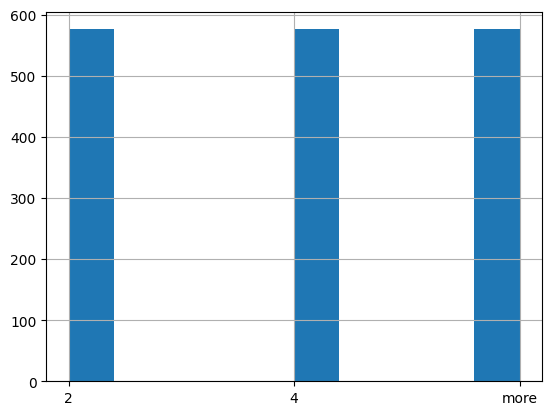

In [44]:
cars["persons"].hist()

<AxesSubplot: >

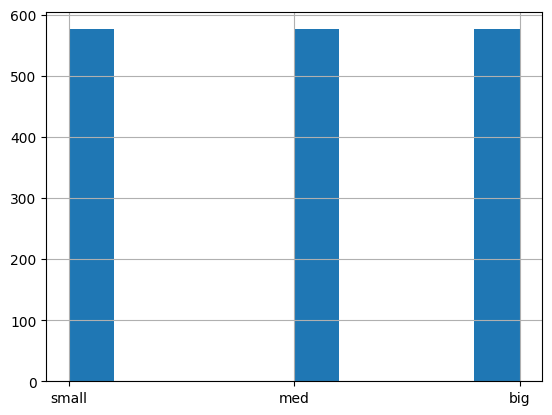

In [45]:
cars["lug_boot"].hist()

<AxesSubplot: >

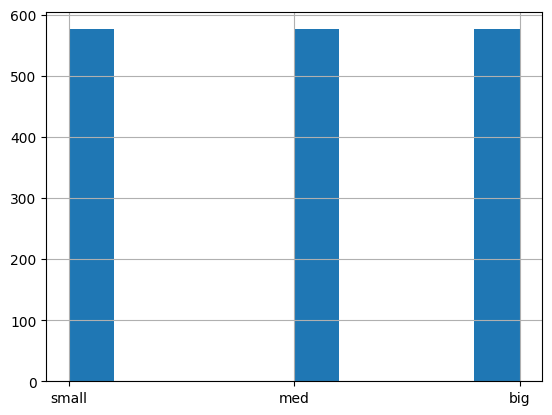

In [46]:
cars["lug_boot"].hist()

Wszystko się zaczyna zmieniać gdy weźmiemy pod uwagę atrybut decyzyjny. Zdecydowana większość samochodów (około 1200) nie była akceptowalna do kupna przez potencjalnego nabywcę. Zaledwie 500 samochodów była akceptowalna lub lepsza do kupna.

<AxesSubplot: >

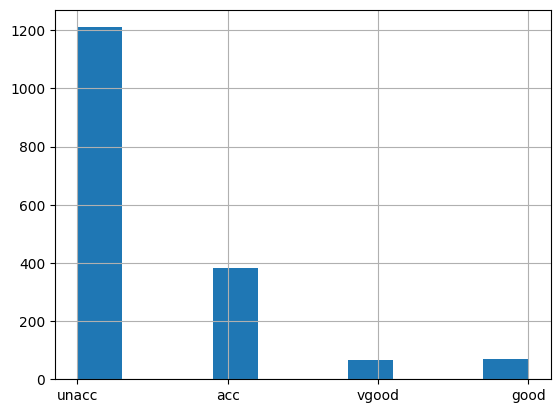

In [47]:
cars["accept"].hist()

Następnie wyświetlono listę duplikatów, które mogą się pojawić w analizowanym zbiorze danych przy pomocy metody `duplicated()` z biblioteki Pandas.

In [48]:
duplicate_rows = cars[cars.duplicated()]
duplicate_rows

,buying,maint,doors,persons,lug_boot,safety,accept


Jak widać powyżej, zbiór danych nie zawiera żadnych duplikatów. By uzyskać pewność, wywołano funkcję `any()` na tablicy values. Funkcja zwróciła wartość False, co oznacza że analizowany zbiór danych nie zawiera duplikatów.

In [49]:
cars.isnull().values.any()

False

In [50]:
cars.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
accept      0
dtype: int64

Następnie zbadano wszystkie atrybuty pod kątem wartości, które biorą udział w ustalaniu wartości atrybutu decyzyjnego.

In [51]:
cars[['buying', 'accept']].groupby(['buying', 'accept'], as_index=False).mean()

,buying,accept
0,high,acc
1,high,unacc
2,low,acc
3,low,good
4,low,unacc
5,low,vgood
6,med,acc
7,med,good
8,med,unacc
9,med,vgood


Z powyższej tabeli wynika, że gdy cena jest wysoka lub bardzo wysoka, to atrakcyjność samochodu jest w najlepszym wypadku akceptowalna, natomiast gdy cena jest średnia lub niska to atrakcyjność samochodu była również dobra lub bardzo dobra. Może to sugerować, że wysoka cena samochodu nie przekłada się na akceptowalność samochodu.

In [52]:
cars[['maint', 'accept']].groupby(['maint', 'accept'], as_index=False).mean()

,maint,accept
0,high,acc
1,high,unacc
2,high,vgood
3,low,acc
4,low,good
5,low,unacc
6,low,vgood
7,med,acc
8,med,good
9,med,unacc


Gdy koszty utrzymania samochodu są bardzo wysokie to akceptowalność samochodu jest w najlepszym wypadku akceptowalna. Co ciekawe, gdy koszt utrzymania jest wysoki, to akceptowalność samochodu była bardzo wysoka. Może to oznaczać że samochód należy do odmiany samochodów sportowych, których koszty konserwacji są wyższe niż zwykłych samochodów.

In [53]:
cars[['doors', 'accept']].groupby(['doors', 'accept'], as_index=False).mean()

,doors,accept
0,2,acc
1,2,good
2,2,unacc
3,2,vgood
4,3,acc
5,3,good
6,3,unacc
7,3,vgood
8,4,acc
9,4,good


Liczba drzwi w samochodzie nie miała żadnego wpływu na akceptowalność.

In [54]:
cars[['persons', 'accept']].groupby(['persons', 'accept'], as_index=False).mean()

,persons,accept
0,2,unacc
1,4,acc
2,4,good
3,4,unacc
4,4,vgood
5,more,acc
6,more,good
7,more,unacc
8,more,vgood


Samochody mogące pomieścić tylko 2 osoby były uniwersalnie odrzucane przez klientów. Wybierano samochody mogące pomieścić 4 osoby lub więcej.

In [55]:
cars[['lug_boot', 'accept']].groupby(['lug_boot', 'accept'], as_index=False).mean()

,lug_boot,accept
0,big,acc
1,big,good
2,big,unacc
3,big,vgood
4,med,acc
5,med,good
6,med,unacc
7,med,vgood
8,small,acc
9,small,good


Samochody mające małą pojemność bagażnika nigdy nie były oceniane bardzo dobrze, poza tym pojemność samochodu nie miała wpływu na akceptowalność.

In [56]:
cars[['safety', 'accept']].groupby(['safety', 'accept'], as_index=False).mean()

,safety,accept
0,high,acc
1,high,good
2,high,unacc
3,high,vgood
4,low,unacc
5,med,acc
6,med,good
7,med,unacc


Samochody o niskim poziomie bezpieczeństwa nigdy nie były akceptowane, samochody o średnim natomiast nigdy nie były oceniane bardzo dobrze. Samochody o wysokim poziomie bezpieczeństwa należały do każdej z klas akceptacji.

In [57]:
pd.crosstab(cars.buying, cars.accept, margins=True).style.background_gradient(cmap='summer_r')

accept,acc,good,unacc,vgood,All
buying,,,,,
high,108,0,324,0,432
low,89,46,258,39,432
med,115,23,268,26,432
vhigh,72,0,360,0,432
All,384,69,1210,65,1728


Wśród samochodów akceptowalnych najwięcej z nich miało średni koszt zakupu, a najmniej miało bardzo wysoki koszt. Wśród samochodów dobrych, jak i bardzo dobrych najwięcej miało niski koszt zakupu, natomiast wszystkie z nich miały co najwyżej średni koszt. Najwięcej samochodów nieakceptowalnych miało wysoki koszt, co może oznaczać, że zbyt wysoka cena zniechęca do kupna samochodu.

In [58]:
pd.crosstab(cars.maint, cars.accept, margins=True).style.background_gradient(cmap='summer_r')

accept,acc,good,unacc,vgood,All
maint,,,,,
high,105,0,314,13,432
low,92,46,268,26,432
med,115,23,268,26,432
vhigh,72,0,360,0,432
All,384,69,1210,65,1728


W przypadku kosztu konserwacji stosunek ilościowy samochodów jest podobny, z wyjątkiem tego, że klienci byli bardziej skłonni zaakceptować wysoki koszt konserwacji (jako bardzo dobrych zostało ocenionych 13 takich samochodów)

In [59]:
pd.crosstab(cars.doors, cars.accept, margins=True).style.background_gradient(cmap='summer_r')

accept,acc,good,unacc,vgood,All
doors,,,,,
2,81,15,326,10,432
3,99,18,300,15,432
4,102,18,292,20,432
5more,102,18,292,20,432
All,384,69,1210,65,1728


Akceptowalność samochodu rosła wraz z liczbą drzwi samochodu.

In [60]:
pd.crosstab(cars.persons, cars.accept, margins=True).style.background_gradient(cmap='summer_r')

accept,acc,good,unacc,vgood,All
persons,,,,,
2,0,0,576,0,576
4,198,36,312,30,576
more,186,33,322,35,576
All,384,69,1210,65,1728


Podobnie było w przypadku liczby pasażerów samochodu.

In [61]:
pd.crosstab(cars.lug_boot, cars.accept, margins=True).style.background_gradient(cmap='summer_r')

accept,acc,good,unacc,vgood,All
lug_boot,,,,,
big,144,24,368,40,576
med,135,24,392,25,576
small,105,21,450,0,576
All,384,69,1210,65,1728


Klienci bardziej akceptowali samochody o większej pojemności bagażnika.

In [62]:
pd.crosstab(cars.safety, cars.accept, margins=True).style.background_gradient(cmap='summer_r')

accept,acc,good,unacc,vgood,All
safety,,,,,
high,204,30,277,65,576
low,0,0,576,0,576
med,180,39,357,0,576
All,384,69,1210,65,1728


Im większe było bezpieczeństwo samochodu, tym bardziej klienci byli skłonni zaakceptować samochód. Warto zauważyć, że jako bardzo dobre oceniane były wyłącznie samochody o wysokim poziomie bezpieczeństwa, a żaden samochód o niskim poziomie bezpieczeństwa nie został zaakceptowany.

In [63]:
# Zamiana wartości stringów na wartości liczbowe 

cars['buying'].replace(['low', 'med', 'high', 'vhigh'], [0,1,2,3], inplace=True)
cars['maint'].replace(['low', 'med', 'high', 'vhigh'], [0,1,2,3], inplace=True)
cars['doors'].replace(['2', '3', '4', '5more'], [0,1,2,3], inplace=True)
cars['persons'].replace(['2', '4', 'more'], [0,1,2], inplace=True)
cars['lug_boot'].replace(['small', 'med', 'big'], [0,1,2], inplace=True)
cars['safety'].replace(['low', 'med', 'high'], [0,1,2], inplace=True)
cars['accept'].replace(['unacc', 'acc', 'good', 'vgood'], [0,1,2,3], inplace=True)

Następnie zamieniono nazwane wartości dyskretne na wartości liczbowe, rosnące wraz ze wzrostem aspektu pozytywnego.

In [64]:
cars

,buying,maint,doors,persons,lug_boot,safety,accept
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,3,2,1,1,2
1724,0,0,3,2,1,2,3
1725,0,0,3,2,2,0,0
1726,0,0,3,2,2,1,2


In [65]:
cars[['buying', 'accept']].groupby(['buying'], as_index=False).mean().sort_values(by='accept', ascending=False)

,buying,accept
0,0,0.689815
1,1,0.553241
2,2,0.250000
3,3,0.166667


In [66]:
cars[['maint', 'accept']].groupby(['maint'], as_index=False).mean().sort_values(by='accept', ascending=False)

,maint,accept
0,0,0.606481
1,1,0.553241
2,2,0.333333
3,3,0.166667


In [67]:
cars[['doors', 'accept']].groupby(['doors'], as_index=False).mean().sort_values(by='accept', ascending=False)

,doors,accept
2,2,0.458333
3,3,0.458333
1,1,0.416667
0,0,0.326389


In [68]:
cars[['persons', 'accept']].groupby(['persons'], as_index=False).mean().sort_values(by='accept', ascending=False)

,persons,accept
1,1,0.625000
2,2,0.619792
0,0,0.000000


In [69]:
cars[['lug_boot', 'accept']].groupby(['lug_boot'], as_index=False).mean().sort_values(by='accept', ascending=False)

,lug_boot,accept
2,2,0.541667
1,1,0.447917
0,0,0.255208


In [70]:
cars[['safety', 'accept']].groupby(['safety'], as_index=False).mean().sort_values(by='accept', ascending=False)

,safety,accept
2,2,0.796875
1,1,0.447917
0,0,0.000000


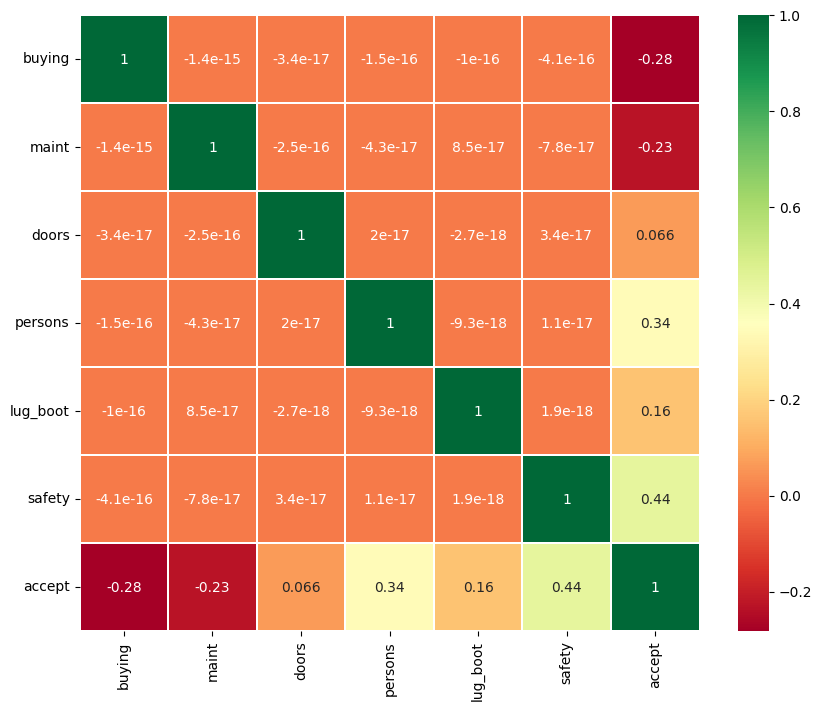

In [71]:
sns.heatmap(cars.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

Z powyższej matrycy wynika, że korelacja jest bliska zeru dla wszystkich wartości poza akceptacją, a największy wpływ na akceptację samochodu ma jego poziom bezpieczeństwa.

Następnie wyliczono współczynnik IR (ang. imbalance ratio).

In [72]:
sizes = cars[["accept"]].groupby(["accept"], as_index=False).size()
sizes.iloc[0]["size"] / (sizes.iloc[1]["size"] + sizes.iloc[2]["size"] + sizes.iloc[3]["size"])

2.335907335907336

# Wnioski

Podczas realizowania zadania zbadano zbiór danych dotyczących akceptacji samochodu. Ustalono, w jaki sposób poszczególne czynniki wpływają na akceptację samochodu przez klientów. Wyciągnięto wniosek, że największy wpływ na akceptację samochodu ma poziom jego bezpieczeństwa, co może wskazywać na to, że producenci samochodów powinni się skupić przede wszystkim na zabezpieczeniu samochodu przed wypadkami i niebezpiecznymi czynnikami. Nie napotkano większych problemów z realizacją zadania.